# Chapter 4: Training Models
___

In chapters 2 and 3 we used a lot of different models without actually understanding what was going on under the hood, i.e. we had no clue about the underlying mathematics used for creating and training such algorithms. Well, this chapter will expose some of the most essentials and basic algorithms in machine learning, namely: 
+ linear regression
+ polynomial regression
+ logistic regression (used for classification)
+ softmax regression (also used for classification)

## 1. Linear Regression

### 1.1. The Basics

A linear regression is model based on the computation of the weighted sum of all the input features: 

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

where: 

+ $\theta_k$ are the weights attributed to each feature $x_k$.
+ $\hat{y}$ is the predicted target variable (the hat means prediction).
+ $\theta_0$ is the bias

objective: the goal of the linear regression is to *find* the correct values for all the parameters $\theta_k$, such that we realize the best predicitions $\hat{y}$.

**Matrix Notation**

In general, we prefer to use linear algebra to write these equations as it is more concise: 
$$
\hat{y} = \theta^T x
$$

where: $\theta^T = [\theta_0, \theta_1, (\cdots), \theta_n]$.  
note that $x_0 = 1$ to preserve the bias.

**Training the Model**

To train the model, we want to minimize the errors we are making, i.e. we want to minimizes the distance between $y$, the target variable, and $\hat{y}$, the predicted target variable. How can we do this? Well, once we have the correct intuition, the answer is quite straightforward. Since we aim to minimize the divergence of $\hat{y}$ from $y$, we select a **loss function** (e.g. the MSE) and we find the vector (the parameters or weights) that minimizes it. Therefore, the optimization problem we face is the following (the MSE is convenient since it is a convex function): 
$$
MSE(\mathbf{X}, h_\theta) = \frac{1}{n} \sum_{i=1}^{n} (\theta^Tx^{(i)} - y^{(i)})^2
$$
where $h_{\theta}$ is the hypothesis for $\theta$.

### 1.2. The Normal Form Equation

**Solving the Optimization Problem**  

To proceed, we first rewrite our problem in matrix notation: 
$$
\text{mse} = \frac{1}{n} (\mathbf{X}\theta - y)^2
$$
where: 
+ $n$: number of observations 
+ $m$: number of features available for predictions
+ $\mathbf{X}$: feature matrix $(n \times m)$
+ $\theta$: paramter vector $(m \times 1)$ 
+ $y$: target variable vector $(n \times 1)$

$$
\text{MSE} = \frac{1}{n} (X\theta - y)^T (X\theta - y)
$$

Expanding the expression:
$$
\text{MSE} = \frac{1}{n} \left( \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y \right)
$$

Since $ (y^T X \theta)^T = \theta^T X^T y $, we have:
$$
\text{MSE} = \frac{1}{n} \left( \theta^T X^T X \theta - 2 \theta^T X^T y + y^T y \right)
$$

Gradient of MSE with respect to $ \theta $:
$$
\nabla_\theta (\text{MSE}) = \frac{1}{n} \left( 2 X^T X \theta - 2 X^T y \right)
$$

Setting the gradient to zero for optimization:
$$
\frac{1}{n} \left( 2 X^T X \theta - 2 X^T y \right) = 0
$$

simplifying:
$$
X^T X \theta = X^T y
$$

Solution for $\theta$:
> $$
> \hat{\theta} = (X^T X)^{-1} X^T y
> $$


This is the **normal equation** or the closed form solution for finding the estimated parameters vector $\hat{\theta}$. Now, let's generate an example for this normal equation: 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import random as rn

In [39]:
# we build a function that generates linear data: 

def lin_fun(x): 
    # the seed 
    np.random.seed(345)

    # the intercept: 
    h = np.random.uniform(-10,10, size=1)

    # the slope: 
    m = np.random.uniform(-10,10, size=1)

    # the noise: 
    e = np.random.normal(-7, 7, size=len(x))

    # the linear function:
    y = m*x + h + e

    return y

# we generate the data:
x = np.linspace(-10,10,100)
y = lin_fun(x)

Now we plot the data we generated:

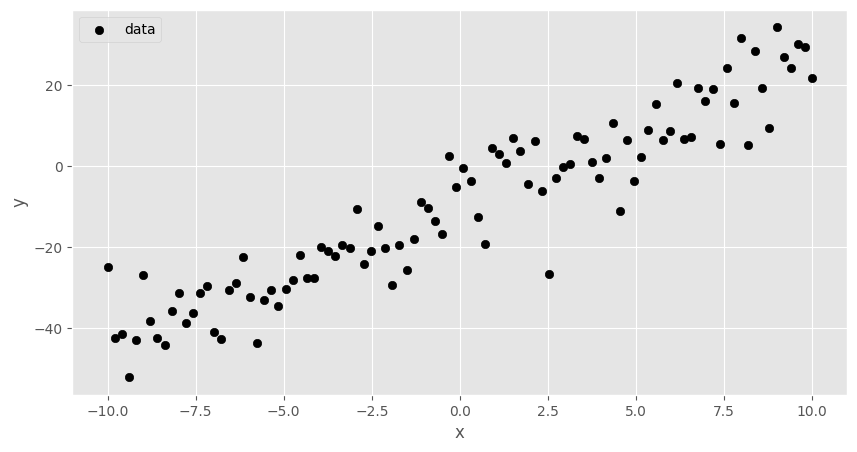

In [40]:
# style: 
plt.style.use('ggplot')

# the plot:
fig, ax = plt.subplots(figsize=(10,5))

# scatter plot:
ax.scatter(x, y, label='data', color='black')

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Clearly, even if we were to ignore the fact that we know how the data generating process (`lin_fun(x)`) works, only the visual inspection would tell us that there is a linear pattern in the data between the input variable $x$ and the target variable $y$. Therefore, if we use the linear regression, we will predict the value of $y$ by using this model: 
$$
\hat{y} = \theta_0 + \theta_1 x
$$
In substance, we need to find the intercept ($\theta_0$) and the slope ($\theta_1$) of the regression line. 